In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

In [35]:
#đọc dữ liệu từ file csv
file_path = './laptopData.csv'
df = pd.read_csv(file_path)
# Chọn các cột 'Cpu', 'Gpu', 'Memory', 'Price'
df_selected = df[['Cpu', 'Gpu', 'Memory', 'Price']]
# Lưu lại dữ liệu vào một file csv mới
output_file_path = './laptopData_filltered_cleaned.csv'
df_selected.to_csv(output_file_path, index =False)
# In ra thông báo
print(f"Đã lưu file các thuộc tính cần lấy: {output_file_path}")

Đã lưu file các thuộc tính cần lấy: ./laptopData_filltered_cleaned.csv


In [36]:
file_path = './laptopData_filltered_cleaned.csv'
df2 = pd.read_csv(file_path)
print(f"Đã đọc file: {file_path}")

Đã đọc file: ./laptopData_filltered_cleaned.csv


In [37]:
print(df2.head())

                          Cpu                           Gpu  \
0        Intel Core i5 2.3GHz  Intel Iris Plus Graphics 640   
1        Intel Core i5 1.8GHz        Intel HD Graphics 6000   
2  Intel Core i5 7200U 2.5GHz         Intel HD Graphics 620   
3        Intel Core i7 2.7GHz            AMD Radeon Pro 455   
4        Intel Core i5 3.1GHz  Intel Iris Plus Graphics 650   

                Memory        Price  
0            128GB SSD   71378.6832  
1  128GB Flash Storage   47895.5232  
2            256GB SSD   30636.0000  
3            512GB SSD  135195.3360  
4            256GB SSD   96095.8080  


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cpu     1273 non-null   object 
 1   Gpu     1273 non-null   object 
 2   Memory  1273 non-null   object 
 3   Price   1273 non-null   float64
dtypes: float64(1), object(3)
memory usage: 40.8+ KB


In [39]:
# Kiểm tra số lượng giá trị thiếu trong từng cột
print(df2.isnull().sum())

# Kiểm tra tổng số giá trị thiếu trong toàn bộ DataFrame
print(df2.isnull().sum().sum())

Cpu       30
Gpu       30
Memory    30
Price     30
dtype: int64
120


In [40]:
rows_with_missing_data = df2[df2.isnull().any(axis=1)]
print("\nCác dòng có giá trị thiếu: ")
print(rows_with_missing_data)


Các dòng có giá trị thiếu: 
      Cpu  Gpu Memory  Price
20    NaN  NaN    NaN    NaN
46    NaN  NaN    NaN    NaN
50    NaN  NaN    NaN    NaN
115   NaN  NaN    NaN    NaN
125   NaN  NaN    NaN    NaN
148   NaN  NaN    NaN    NaN
190   NaN  NaN    NaN    NaN
209   NaN  NaN    NaN    NaN
267   NaN  NaN    NaN    NaN
336   NaN  NaN    NaN    NaN
350   NaN  NaN    NaN    NaN
478   NaN  NaN    NaN    NaN
567   NaN  NaN    NaN    NaN
616   NaN  NaN    NaN    NaN
625   NaN  NaN    NaN    NaN
629   NaN  NaN    NaN    NaN
666   NaN  NaN    NaN    NaN
699   NaN  NaN    NaN    NaN
726   NaN  NaN    NaN    NaN
747   NaN  NaN    NaN    NaN
753   NaN  NaN    NaN    NaN
774   NaN  NaN    NaN    NaN
922   NaN  NaN    NaN    NaN
923   NaN  NaN    NaN    NaN
938   NaN  NaN    NaN    NaN
978   NaN  NaN    NaN    NaN
994   NaN  NaN    NaN    NaN
1060  NaN  NaN    NaN    NaN
1202  NaN  NaN    NaN    NaN
1245  NaN  NaN    NaN    NaN


In [41]:
# Xoá các dòng có giá trị thiếu trong các cột đã chọn
df_cleaned = df2.dropna()
# Đặt lại chỉ số sau khi xoá các dòng
df_cleaned.reset_index(drop=True, inplace=True)
# Cập nhật df2 mới 
df2 = df_cleaned


In [42]:
#Kiểm tra lại còn dữ liệu thiếu không
df2.info()

# Kiểm tra số lượng giá trị thiếu trong từng cột
print(df2.isnull().sum())

# Kiểm tra tổng số giá trị thiếu trong toàn bộ DataFrame
print(df2.isnull().sum().sum())

# Lưu lại vào file
output_file_path = './laptopData_filltered_cleaned.csv'
df2.to_csv(output_file_path, index=False)
print(f"Đã lưu file: {output_file_path}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cpu     1273 non-null   object 
 1   Gpu     1273 non-null   object 
 2   Memory  1273 non-null   object 
 3   Price   1273 non-null   float64
dtypes: float64(1), object(3)
memory usage: 39.9+ KB
Cpu       0
Gpu       0
Memory    0
Price     0
dtype: int64
0
Đã lưu file: ./laptopData_filltered_cleaned.csv


In [46]:
df2['Memory'] = df2['Memory'].str.replace(r'\d+(GB|TB)\+?\d*(GB|TB)?\s*', '', regex=True)
# df2 = df2.drop(columns=['Memory_Type'])
# Lưu lại vào file
output_file_path = './laptopData_filltered_cleaned.csv'
df2.to_csv(output_file_path, index=False)
print(f"Đã lưu file: {output_file_path}")
df2.head(5)

Đã lưu file: ./laptopData_filltered_cleaned.csv


,Cpu,Gpu,Memory,Price
0,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,SSD,71378.6832
1,Intel Core i5 1.8GHz,Intel HD Graphics 6000,Flash Storage,47895.5232
2,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,SSD,30636.0000
3,Intel Core i7 2.7GHz,AMD Radeon Pro 455,SSD,135195.3360
4,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,SSD,96095.8080


In [ ]:
# Kiểm tra  sự phân bổ của 'Cpu'
print(df2['Cpu'].value_counts())

Cpu
Intel Core i5 7200U 2.5GHz       183
Intel Core i7 7700HQ 2.8GHz      142
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64


In [ ]:

import matplotlib.pyplot as plt


data= pd.read_csv('./laptopData_filltered_cleaned.csv')

df2 = pd.DataFrame(data)


# Tạo một cột mới với giá trị số cho Intel 
def classify_cpu(cpu_name):
    if 'Intel' in cpu_name:
        return 1  # Intel
    elif 'AMD' in cpu_name:
        return 2  # AMD
    else:
        return 0  # Other

df2['Cpu_Value'] = df2['Cpu'].apply(classify_cpu)

# Hiển thị DataFrame với cột mới
print(df2.head(10))

                          Cpu                           Gpu         Memory  \
0        Intel Core i5 2.3GHz  Intel Iris Plus Graphics 640            SSD   
1        Intel Core i5 1.8GHz        Intel HD Graphics 6000  Flash Storage   
2  Intel Core i5 7200U 2.5GHz         Intel HD Graphics 620            SSD   
3        Intel Core i7 2.7GHz            AMD Radeon Pro 455            SSD   
4        Intel Core i5 3.1GHz  Intel Iris Plus Graphics 650            SSD   
5     AMD A9-Series 9420 3GHz                 AMD Radeon R5            HDD   
6        Intel Core i7 2.2GHz       Intel Iris Pro Graphics  Flash Storage   
7        Intel Core i5 1.8GHz        Intel HD Graphics 6000  Flash Storage   
8  Intel Core i7 8550U 1.8GHz          Nvidia GeForce MX150            SSD   
9  Intel Core i5 8250U 1.6GHz        Intel UHD Graphics 620            SSD   

         Price  Cpu_Value  
0   71378.6832          1  
1   47895.5232          1  
2   30636.0000          1  
3  135195.3360          1  
4

In [48]:
df2

,Cpu,Gpu,Memory,Price,Cpu_Value
0,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,SSD,71378.6832,1
1,Intel Core i5 1.8GHz,Intel HD Graphics 6000,Flash Storage,47895.5232,1
2,Intel Core i5 7200U 2.5GHz,Intel HD Graphics 620,SSD,30636.0000,1
3,Intel Core i7 2.7GHz,AMD Radeon Pro 455,SSD,135195.3360,1
4,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,SSD,96095.8080,1
...,...,...,...,...,...
1268,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520,SSD,33992.6400,1
1269,Intel Core i7 6500U 2.5GHz,Intel HD Graphics 520,SSD,79866.7200,1
1270,Intel Celeron Dual Core N3050 1.6GHz,Intel HD Graphics,Flash Storage,12201.1200,1
1271,Intel Core i7 6500U 2.5GHz,AMD Radeon R5 M330,HDD,40705.9200,1


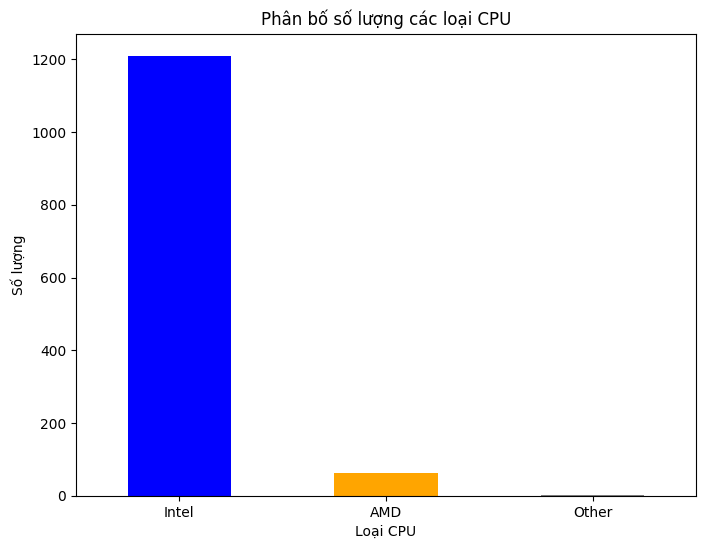

(np.float64(-1.0999998867392624),
 np.float64(1.0999997083480364),
 np.float64(-1.0999996802232763),
 np.float64(1.099999984772537))

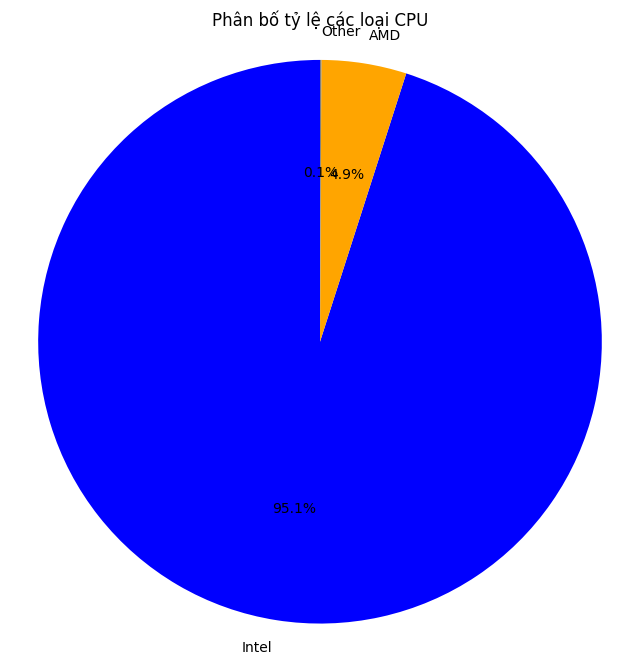

In [ ]:
# Đếm số lượng mỗi loại CPU dựa trên 'Cpu_Value'
cpu_counts = df2['Cpu_Value'].value_counts()

# Đặt nhãn cho các giá trị số (1: Intel, 2: AMD, 0: Other)
labels = {1: 'Intel', 2: 'AMD', 0: 'Other'}
cpu_counts.index = cpu_counts.index.map(labels)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
cpu_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Phân bố số lượng các loại CPU')
plt.xlabel('Loại CPU')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(cpu_counts, labels=cpu_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'gray'])
plt.title('Phân bố tỷ lệ các loại CPU')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều

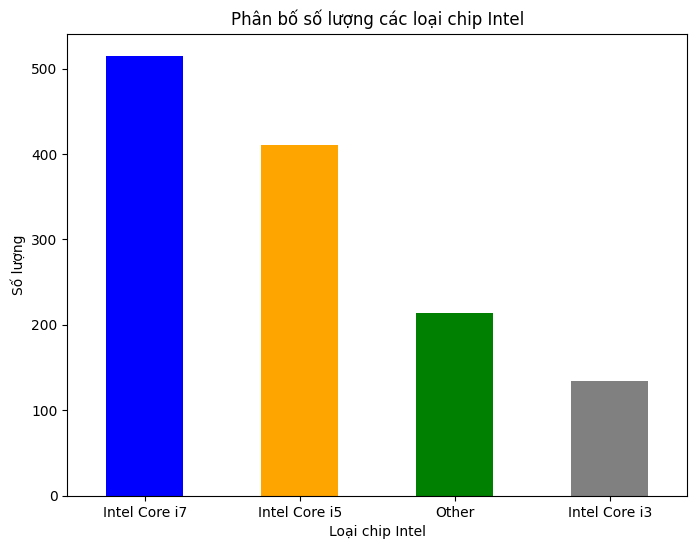

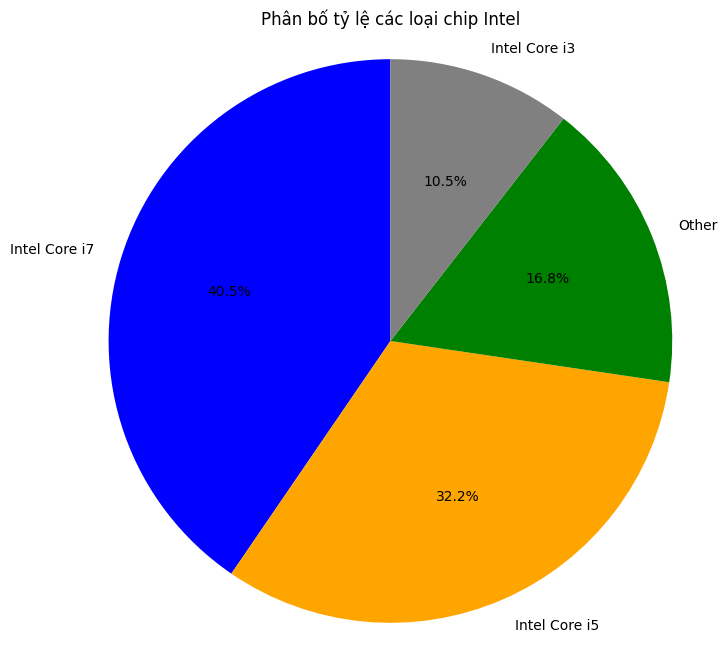

In [ ]:
data= pd.read_csv('./laptopData_filltered_cleaned.csv')

df2 = pd.DataFrame(data)
# Tạo trường mới 'Cpu_Generation'
def map_cpu_generation(Cpu):
    if 'i5' in Cpu:
        return "Intel Core i5"
    elif 'i7' in Cpu:
        return "Intel Core i7"
    elif 'i3' in Cpu:
        return "Intel Core i3"
    else:
        return "Other"

# Áp dụng hàm cho cột 'Cpu' và tạo cột mới
df2['Cpu_Generation'] = df2['Cpu'].apply(map_cpu_generation)

import matplotlib.pyplot as plt

# Đếm số lượng mỗi loại chip Intel
cpu_generation_counts = df2['Cpu_Generation'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
cpu_generation_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'gray'])
plt.title('Phân bố số lượng các loại chip Intel')
plt.xlabel('Loại chip Intel')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()
# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(cpu_generation_counts, labels=cpu_generation_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'green', 'gray'])
plt.title('Phân bố tỷ lệ các loại chip Intel')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()



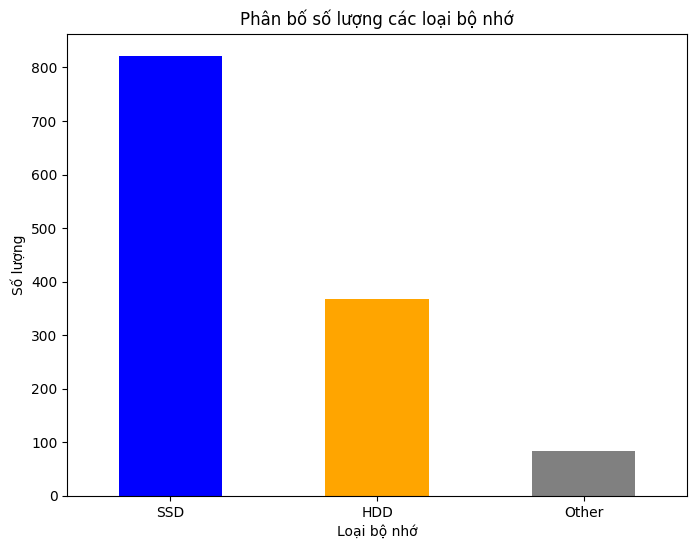

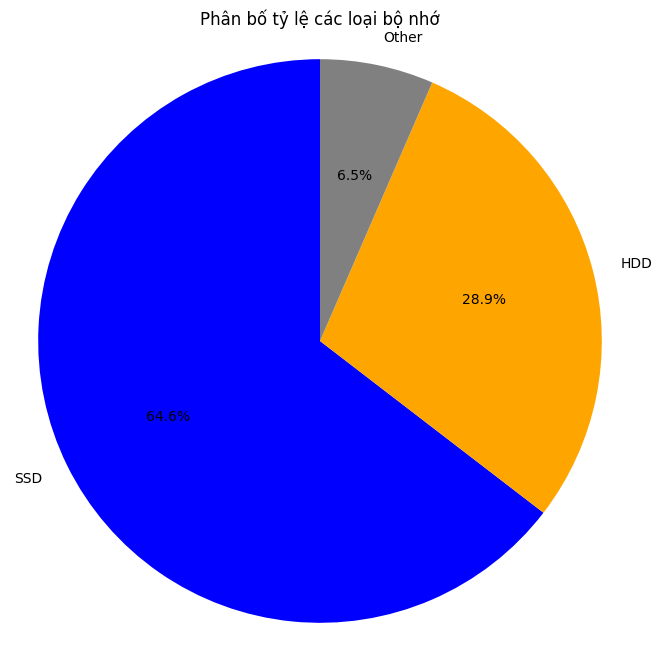

In [ ]:


import matplotlib.pyplot as plt

data= pd.read_csv('./laptopData_filltered_cleaned.csv')

df2 = pd.DataFrame(data)


# Hàm phân loại Memory
def classify_memory(memory):
    if 'SSD' in memory: 
        return 1  # SSD
    elif 'HDD' in memory: 
        return 2  # HDD
    else:
        return 0  # Other (Cả SSD và HDD hoặc loại khác)

# Tạo cột mới 'Memory_Type'
df2['Memory_Type'] = df2['Memory'].apply(classify_memory)

# Đếm số lượng mỗi loại Memory
memory_counts = df2['Memory_Type'].value_counts()

# Gắn nhãn cho các giá trị số
labels = {1: 'SSD', 2: 'HDD', 0: 'Other'}
memory_counts.index = memory_counts.index.map(labels)

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
memory_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Phân bố số lượng các loại bộ nhớ')
plt.xlabel('Loại bộ nhớ')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(memory_counts, labels=memory_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'gray'])
plt.title('Phân bố tỷ lệ các loại bộ nhớ')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()



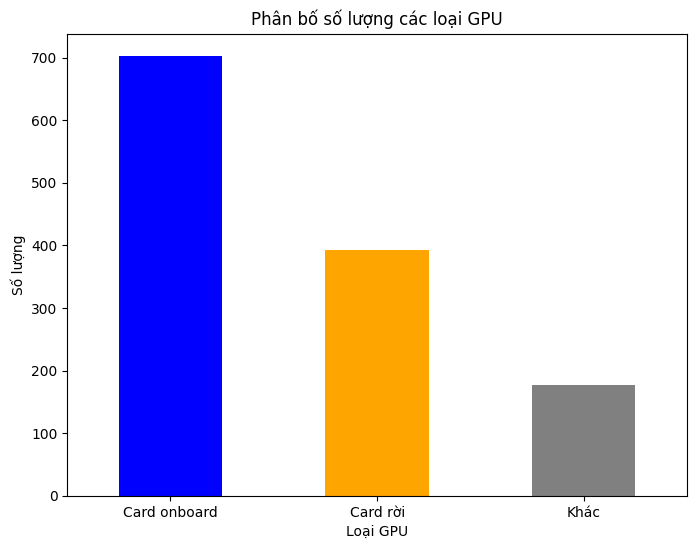

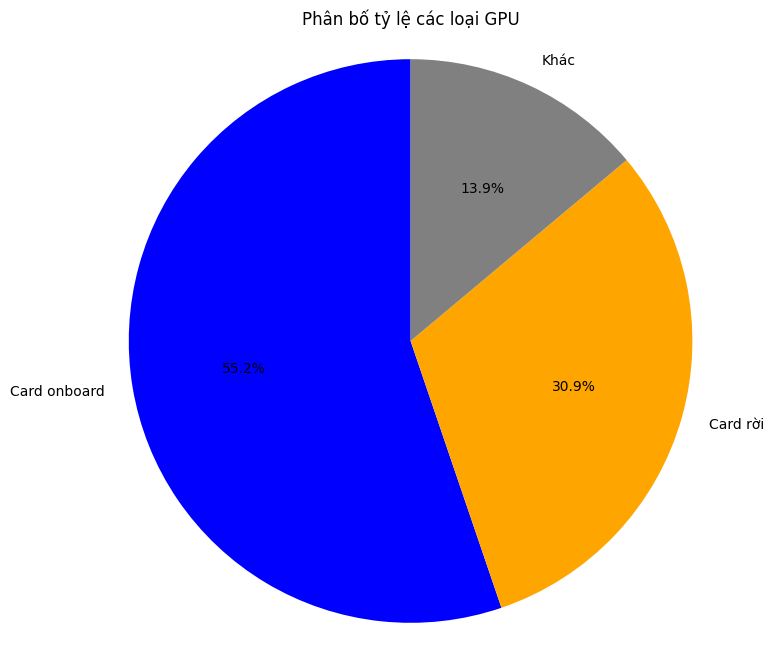

In [ ]:


data= pd.read_csv('./laptopData_filltered_cleaned.csv')
df2 = pd.DataFrame(data)

# Chuẩn hóa dữ liệu
df2['Gpu'] = df2['Gpu'].str.lower().str.strip()

# Hàm phân loại GPU thành 'Card onboard' hoặc 'Card rời'
def classify_gpu_type(gpu):
    if 'intel' in gpu and 'graphics' in gpu:
        return 'Card onboard'  # GPU tích hợp
    elif 'nvidia' in gpu:
        return 'Card rời'  # GPU rời của NVIDIA
    else:
        return 'Khác'  # Các loại khác không thuộc hai loại trên

# Tạo cột mới 'Gpu_Category'
df2['Gpu_Category'] = df2['Gpu'].apply(classify_gpu_type)

import matplotlib.pyplot as plt

# Đếm số lượng mỗi loại GPU
gpu_counts = df2['Gpu_Category'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
gpu_counts.plot(kind='bar', color=['blue', 'orange', 'gray'])
plt.title('Phân bố số lượng các loại GPU')
plt.xlabel('Loại GPU')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(gpu_counts, labels=gpu_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange', 'gray'])
plt.title('Phân bố tỷ lệ các loại GPU')
plt.axis('equal')  # Đảm bảo biểu đồ tròn đều
plt.show()



Lower Bound: 0, Upper Bound: 45249757.82712
False
   Price_VND
0 21,466,425
1 14,404,100
2  9,213,471
3 40,658,645
4 28,899,853


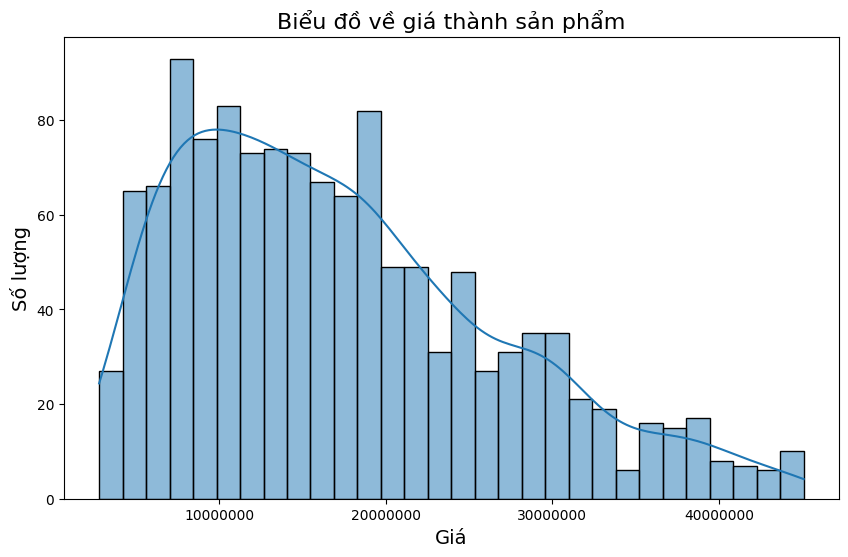

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tỷ giá cố định từ INR sang VND (ví dụ: 1 INR = 300.74 VND)
rate_inr_to_vnd = 300.74

# Đọc dữ liệu từ CSV
data = pd.read_csv('./laptopData_filltered_cleaned.csv')

# Chuyển đổi từ INR sang VND
data['Price_VND'] = data['Price'] * rate_inr_to_vnd

# Đặt tùy chọn hiển thị để số liệu không dùng dạng khoa học
pd.set_option('display.float_format', '{:,.0f}'.format)

# Tính toán IQR (Interquartile Range)
Q1 = data['Price_VND'].quantile(0.25)
Q3 = data['Price_VND'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
# Đảm bảo giới hạn dưới không âm
lower_bound = max(0, lower_bound)  # Nếu lower_bound âm thì thay bằng 0
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Thay thế các giá trị ngoài IQR bằng NaN
data.loc[(data['Price_VND'] < lower_bound) | (data['Price_VND'] > upper_bound), 'Price_VND'] = np.nan

# Lấy top 5 giá trị có tần suất cao nhất
top5_Price_VND = data['Price_VND'].value_counts().nlargest(5)
prob = top5_Price_VND / top5_Price_VND.sum()  # Tính xác suất của từng giá trị

# Generate giá trị theo phân phối của top 5 giá trị
data['Price_VND'] = data['Price_VND'].apply(lambda x: np.random.choice(top5_Price_VND.index, p=prob) if pd.isnull(x) else x)

# Kiểm tra xem còn giá trị NaN nào không
print(data['Price_VND'].isnull().any())  # Mọi thứ đều ổn nếu không còn NaN

# In ra dữ liệu đã chuyển đổi
print(data[['Price_VND']].head())

# Vẽ biểu đồ histogram cho cột 'Price_VND'
plt.figure(figsize=(10, 6))  # Thiết lập kích thước biểu đồ
sns.histplot(data['Price_VND'], kde=True, bins=30)  # 'kde=True' để vẽ đường cong mật độ
plt.title('Biểu đồ về giá thành sản phẩm', fontsize=16)  # Tiêu đề biểu đồ
plt.xlabel('Giá', fontsize=14)  # Nhãn trục X
plt.ylabel('Số lượng', fontsize=14)  # Nhãn trục Y
plt.ticklabel_format(style='plain', axis='both')
plt.show()



In [ ]:
client=MongoClient('mongodb://localhost:27017/')
db=client['laptopData']
collection=db['khiem']
data_dict=df.to_dict('records')
collection.insert_many(data_dict)
print('Da luu du lieu vao MongoDB')


Da luu du lieu vao MongoDB


In [44]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200
